# Quantium Forage Virtual Learning Experience: 1
I am part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

**My responsibilities:**

1.   Examine the Transaction Data
2.   Examine the Customer Data
3.   Data Analysis and customer segments
4.   Deeper insights on the customer segments

**Data provided**

*1.  Transaction Data*

*   Date (DATE)
*   Store number (STORE_NBR)
*   Loyalty Card number (LYLTY_CARD_NBR)
*   Transaction ID (TXN_ID)
*   Product Number (PROD_NBR)
*   Product Name (PROD_NAME)
*   Product Quantity (PROD_QTY)
*   Total Sales $ (TOT_SALES)


*2.  Customer Purchase behavoiour*

*  Loyalty Card Number (LYLTY_CARD_NBR)
*  Type of Customer: Couple/Single/Old/Young (LIFESTAGE)
*  Loyalty Subscription (PREMIUM_CUSTOMER)

We will start with importing libraries which could be useful for our further exploration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Next we will import the Transacation data as a dataframe

In [ ]:
transaction_data = pd.read_csv("/content/drive/MyDrive/QVI_transaction_data.csv")

We will check the data frame if its the same

In [ ]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


We will do the same for the Purchase behaviour data.

In [ ]:
purchase_behaviour = pd.read_csv("/content/drive/MyDrive/QVI_purchase_behaviour.csv")
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Now we will perform a right join with respect to 'purchase_behaviour' and 'transaction_data' for getting the complete data of everyone who purchased something from the store to analyse the sales.

In [ ]:
sales_data = pd.merge(purchase_behaviour, transaction_data, on='LYLTY_CARD_NBR', how='right')
sales_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
print(sales_data['DATE'].dtype)

int64


Format of data isn't what is expected, so we will correct the format of date. Converting dates to standard format using timedelta library, number of days since 1 January 1900.

In [ ]:
sales_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,4074,MIDAGE SINGLES/COUPLES,Budget,43604,4,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,4149,MIDAGE SINGLES/COUPLES,Budget,43601,4,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,4196,MIDAGE SINGLES/COUPLES,Budget,43601,4,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,5026,MIDAGE SINGLES/COUPLES,Budget,43332,5,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,7150,MIDAGE SINGLES/COUPLES,Budget,43330,7,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


We will export the complete Sales data for further reference and backup

In [ ]:
sales_data.to_csv('/content/drive/My Drive/sales_data.csv', index=False)

We will plot a box plot to identify any outliers in Product Quantity and Total Sales

<Axes: xlabel='PROD_QTY'>

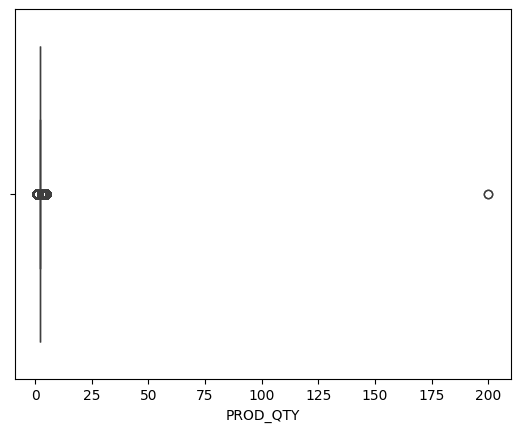

In [ ]:
sns.boxplot(x=sales_data["PROD_QTY"])

From the boxplot we can know the presence of outliers much greater than other values of the Product Quantity, hence we will sort the data in descending order of the product quantity.

In [ ]:
prod_sales_data = sales_data.sort_values('PROD_QTY', ascending = False)
prod_sales_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,OLDER FAMILIES,Premium,43331,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,OLDER FAMILIES,Premium,43605,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,201060,YOUNG FAMILIES,Premium,43603,201,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,219004,YOUNG SINGLES/COUPLES,Mainstream,43326,219,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,261331,YOUNG SINGLES/COUPLES,Mainstream,43604,261,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0
228749,232138,YOUNG SINGLES/COUPLES,Budget,43604,232,235978,109,Pringles Barbeque 134g,5,18.5
117802,176471,OLDER SINGLES/COUPLES,Premium,43604,176,177469,17,Kettle Sensations BBQ&Maple 150g,5,23.0
228711,205149,YOUNG SINGLES/COUPLES,Budget,43329,205,204215,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
238397,238337,YOUNG SINGLES/COUPLES,Mainstream,43603,238,243243,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
238395,238250,YOUNG SINGLES/COUPLES,Mainstream,43604,238,242874,88,Kettle Honey Soy Chicken 175g,5,27.0


From the sorted data we can see the outlier data has product quantity of 200 (as also seen in the box plot), so we will remove the both the rows having values equal to 200.


These outliers may represent a special case where a very large amount of chips were ordered and it may affect the actual insights which we are intending to find through this data.

In [ ]:
sales_data_without_outliers = sales_data[sales_data['PROD_QTY'] != 200]
sales_data_without_outliers.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,4074,MIDAGE SINGLES/COUPLES,Budget,43604,4,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,4149,MIDAGE SINGLES/COUPLES,Budget,43601,4,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,4196,MIDAGE SINGLES/COUPLES,Budget,43601,4,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,5026,MIDAGE SINGLES/COUPLES,Budget,43332,5,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,7150,MIDAGE SINGLES/COUPLES,Budget,43330,7,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


Now as we have removed the outliers we will save the data for backup in case something happens with online notebook.

In [ ]:
sales_data_without_outliers.to_csv('/content/drive/My Drive/out_sales_data.csv', index=False)

We will now look into number of customers in various lifestages.

In [ ]:
sales_data_without_outliers['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64

From this we derive that we have greatest customer base of people who are in their older stage of life including Retirees and Families.

Next we would look into distribution of customers in different price segments

In [ ]:
sales_data_without_outliers['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69689
Name: count, dtype: int64

From this we can understand that we have greatest customers of mainstream and budget segments. Number of premium customers is low.

Next we will plot a bar graph showing the distribution of price segments in each customer life stage category.

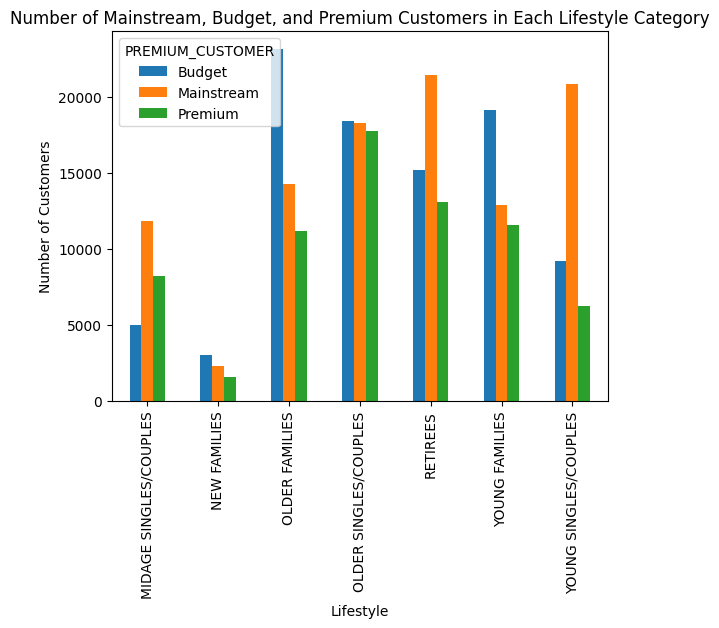

In [ ]:
import matplotlib.pyplot as plt

lifestyles = sales_data_without_outliers.groupby('LIFESTAGE')['PREMIUM_CUSTOMER'].value_counts()

fig, ax = plt.subplots()
lifestyles.unstack().plot(kind='bar', ax=ax)
ax.set_xlabel('Lifestyle')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Mainstream, Budget, and Premium Customers in Each Lifestyle Category')
plt.show()


Some of the insights we can gain from the price segment customer as per their lifestages bar graph are as follows:

*   We have greatest number premium customers in Older Singles/Couples.
*   In Older Singles/Couples each price category has equivalent number of customers.
*   Whereas older families majorly are budget buyers. On further exploration we can see a general trend that families mostly are budget buyers.
*   Singles/Couples mostly prefer Mainstream products irrespective of the age. Even retirees are also mainstream buyers.

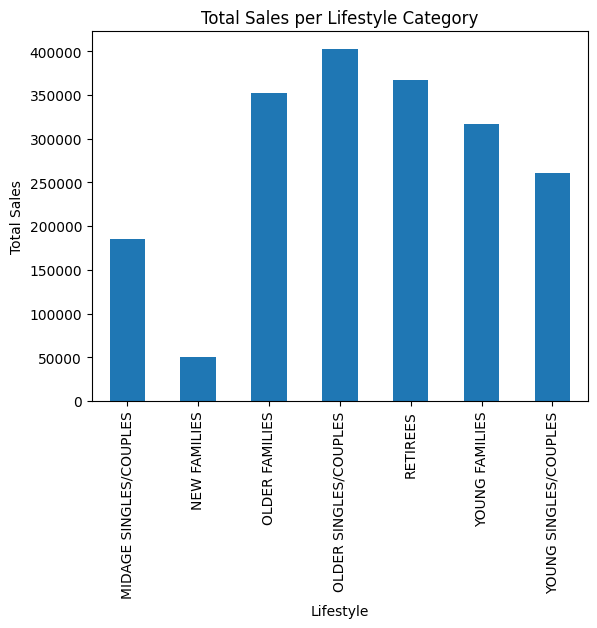

In [ ]:
lifestyle_sales = sales_data_without_outliers.groupby('LIFESTAGE')['TOT_SALES'].sum()

fig, ax = plt.subplots()
lifestyle_sales.plot(kind='bar', ax=ax)
ax.set_xlabel('Lifestyle')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales per Lifestyle Category')
plt.show()


Continuing the trend, we can see highest sales in the Older Lifestage categories.

Now we would look into the Average Sales per Customer as per Lifestyle Category

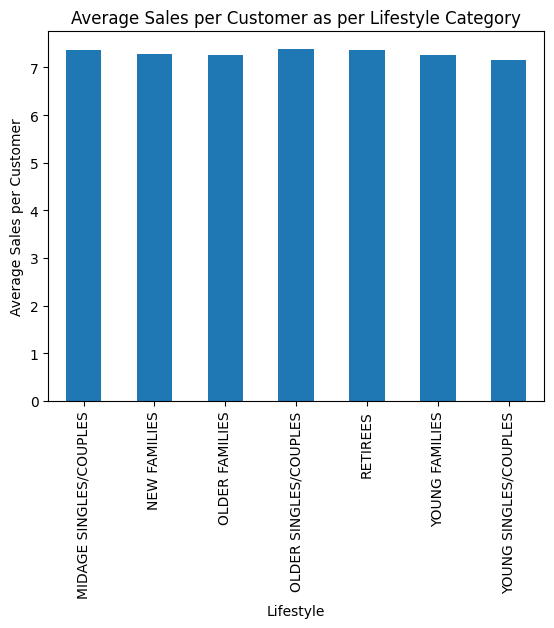

In [ ]:
average_sales_per_customer = sales_data_without_outliers.groupby('LIFESTAGE')['TOT_SALES'].mean()

fig, ax = plt.subplots()
average_sales_per_customer.plot(kind='bar', ax=ax)
ax.set_xlabel('Lifestyle')
ax.set_ylabel('Average Sales per Customer')
ax.set_title('Average Sales per Customer as per Lifestyle Category')
plt.show()


Hence we can conclude that there is no major change in average spending as per the lifestage. Almost everyone spends 7 dollars on an average.

Now we will analyse total sales in each customer price segment

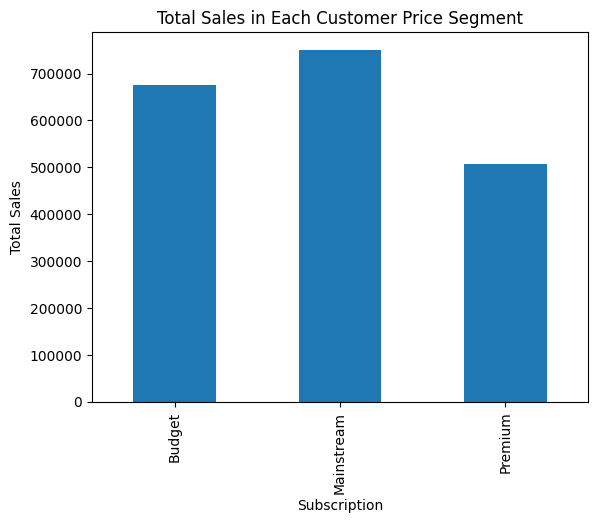

In [ ]:
premium_customer_sales_by_subs = sales_data_without_outliers.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

fig, ax = plt.subplots()
premium_customer_sales_by_subs.plot(kind='bar', ax=ax)
ax.set_xlabel('Subscription')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales in Each Customer Price Segment')
plt.show()

Mainstream buyers are responsible of major amount of sales. Sales due to budget buyers is also high. Whereas sales due to Premium customers is less.

To plot time series sales data we will first convert 'DATE' column to datetime format.

In [ ]:
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'])
sales_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,1970-01-01 00:00:00.000043390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,1970-01-01 00:00:00.000043599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,1970-01-01 00:00:00.000043605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,1970-01-01 00:00:00.000043329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,1970-01-01 00:00:00.000043330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now checking the data type of 'DATE' series of the data frame

In [ ]:
print(sales_data_without_outliers['DATE'].dtypes)

int64


Plotting the time series line graph of Total sales throughout the year from July 2018 to July 2019

<ipython-input-21-4cf56a020c88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_without_outliers['DATE'] = pd.to_datetime(sales_data_without_outliers['DATE'])


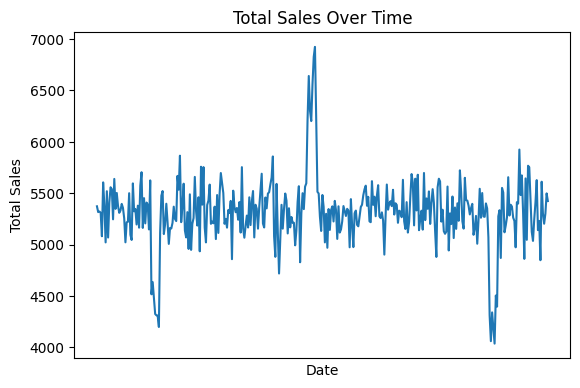

In [ ]:
sales_data_without_outliers['DATE'] = pd.to_datetime(sales_data_without_outliers['DATE'])

sales_by_date = sales_data_without_outliers.groupby('DATE')['TOT_SALES'].sum()

sales_by_date.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.show()


From this sales time series plot we can derive following insights
*  There is a sudden increase in sales by a large amount in month of December
*  Also there is decrease in sales two times which are August 2018 and June 2019
*  For other time total sales approximately remain in the range of 5000 to 5500 per day.

Now we will find the stores which were responsible for highest sales.

In [ ]:
top_10_stores = sales_data.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
print(top_10_stores)

STORE_NBR
226    18905.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64


Store number 226 is store responsible for highest sales and that too by a considerable margin.

We will add one column showing the product price which is total sales divided by the product quantity

In [ ]:
sales_data_without_outliers['PROD_PRICE'] = sales_data_without_outliers['TOT_SALES'] / sales_data_without_outliers['PROD_QTY']
sales_data_without_outliers.head()


<ipython-input-23-d946c91f9590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_without_outliers['PROD_PRICE'] = sales_data_without_outliers['TOT_SALES'] / sales_data_without_outliers['PROD_QTY']


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE
0,1000,YOUNG SINGLES/COUPLES,Premium,1970-01-01 00:00:00.000043390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00
1,1307,MIDAGE SINGLES/COUPLES,Budget,1970-01-01 00:00:00.000043599,1,348,66,CCs Nacho Cheese 175g,3,6.3,2.10
2,1343,MIDAGE SINGLES/COUPLES,Budget,1970-01-01 00:00:00.000043605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45
3,2373,MIDAGE SINGLES/COUPLES,Budget,1970-01-01 00:00:00.000043329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00
4,2426,MIDAGE SINGLES/COUPLES,Budget,1970-01-01 00:00:00.000043330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60


Now we will find the most sold products

In [ ]:
top_10_soldproducts = sales_data_without_outliers.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10)
print(top_10_soldproducts)


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Tostitos Splash Of  Lime 175g               6234
Tyrrells Crisps     Ched & Chives 165g      6227
Kettle 135g Swt Pot Sea Salt                6212
Infuzions Thai SweetChili PotatoMix 110g    6206
Thins Potato Chips  Hot & Spicy 175g        6185
Doritos Corn Chips  Cheese Supreme 170g     6180
Name: PROD_QTY, dtype: int64


Highest quantity of Kettle Mozzarella Basil & Persto 175g packets were sold

Now we will see the prices of most sold products

In [ ]:
top_10_soldproducts_prices = sales_data_without_outliers[sales_data_without_outliers['PROD_NAME'].isin(top_10_soldproducts.index)]
top_10_soldproducts_prices = top_10_soldproducts_prices.groupby('PROD_NAME')['PROD_PRICE'].mean()
print(top_10_soldproducts_prices)

PROD_NAME
Cobs Popd Sea Salt  Chips 110g              3.800000
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3.800000
Doritos Corn Chips  Cheese Supreme 170g     4.399316
Infuzions Thai SweetChili PotatoMix 110g    3.800000
Kettle 135g Swt Pot Sea Salt                4.200000
Kettle Mozzarella   Basil & Pesto 175g      5.400000
Kettle Tortilla ChpsHny&Jlpno Chili 150g    4.600000
Thins Potato Chips  Hot & Spicy 175g        3.300000
Tostitos Splash Of  Lime 175g               4.400000
Tyrrells Crisps     Ched & Chives 165g      4.199572
Name: PROD_PRICE, dtype: float64


Most sold products are in 3-4 dollar price range which shows significance of budget and mainstream buyers

Now we will see the products which produced greatest sales revenue throught the year

In [ ]:
top_10_salesproducts = sales_data_without_outliers.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
print(top_10_salesproducts)

PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64


We will also see the price of products producing greatest sales

In [ ]:
top_10_salesproducts_prices = sales_data_without_outliers[sales_data_without_outliers['PROD_NAME'].isin(top_10_salesproducts.index)]
top_10_salesproducts_prices = top_10_salesproducts_prices.groupby('PROD_NAME')['PROD_PRICE'].mean()
print(top_10_salesproducts_prices)


PROD_NAME
Cheezels Cheese 330g                        5.700000
Dorito Corn Chp     Supreme 380g            6.368285
Doritos Cheese      Supreme 330g            5.700000
Kettle Mozzarella   Basil & Pesto 175g      5.400000
Kettle Original 175g                        5.399145
Kettle Sea Salt     And Vinegar 175g        5.400000
Kettle Sweet Chilli And Sour Cream 175g     5.398988
Smiths Crinkle      Original 330g           5.700000
Smiths Crinkle Chips Salt & Vinegar 330g    5.700000
Smiths Crnkle Chip  Orgnl Big Bag 380g      5.900000
Name: PROD_PRICE, dtype: float64


We can see the products with price range of 5-6 dollars are major contributors in the sales revenue.

Just for fun we can also find the best performing product in terms of quantity sold and sales revenue.

In [ ]:
common_products = set(top_10_salesproducts.index).intersection(top_10_soldproducts.index)
print(common_products)


{'Kettle Mozzarella   Basil & Pesto 175g'}


Hence this was a basic analysis of sales data of Chips. This would give us an overall idea of Chips packet sales. Further insights can be derived from plots in this notebook as well as combined sales data.

Summary of insights:

*  There is a sudden increase in sales by a large amount in month of December
*  Also there is decrease in sales two times which are August 2018 and June 2019
*  For other time total sales approximately remain in the range of 5000 to 5500 per day.
*  Most sold products are in 3-4 dollar price range which shows significance of budget and mainstream buyers
*  We can see the products with price range of 5-6 dollars are major contributors in the sales revenue.
*  Store number 226 is store responsible for highest sales and that too by a considerable margin.
*  We have greatest number premium customers in Older Singles/Couples.
*   In Older Singles/Couples each price category has equivalent number of customers.
*   Whereas older families majorly are budget buyers. On further exploration we can see a general trend that families mostly are budget buyers.
*   Singles/Couples mostly prefer Mainstream products irrespective of the age. Even retirees are also mainstream buyers.